In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

1. Построить диаграмму рассеяния для вышеупомянутых переменных

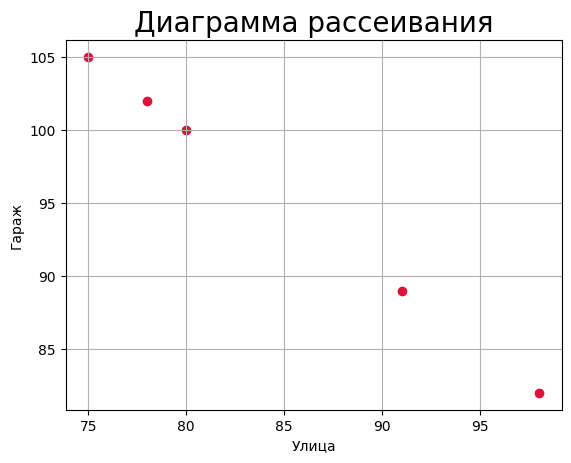

In [9]:
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])
days = np.array(['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница'])
plt.grid(True)
plt.title("Диаграмма рассеивания", fontsize = 20)
plt.xlabel("Улица")
plt.ylabel("Гараж")
plt.scatter(street, garage, marker = 'o', color = 'crimson')
# plt.scatter(x, days, marker = 'o', color = 'crimson')
# plt.scatter(y, days, marker = 'x', color = 'crimson')

2. Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону).

In [11]:
print("Корреляция по Пирсону:")
np.corrcoef(street, garage)[0, 1]

Корреляция по Пирсону:


-0.9999999999999998

Коэффициент корреляции практически равен –1, что означает сильную отрицательную корреляцию.

3. Загрузить bitcoin.csv.

In [5]:
bitcoin: pd.DataFrame = pd.read_csv('bitcoin.csv')
bitcoin.describe()

,Unnamed: 0,high,low,open,volumefrom,volumeto,close
count,2001.000000,2001.000000,2001.00000,2001.000000,2001.000000,2.001000e+03,2001.000000
mean,1000.000000,9676.696462,9053.13932,9382.567321,67879.827936,6.200236e+08,9400.737911
std,577.783264,12789.382358,11880.38559,12372.864718,50970.461471,9.370947e+08,12386.471353
min,0.000000,375.890000,350.39000,368.020000,9355.130000,7.377922e+06,368.020000
25%,500.000000,1496.390000,1424.05000,1445.930000,34044.180000,1.052839e+08,1485.550000
50%,1000.000000,6839.600000,6545.41000,6707.460000,52271.640000,3.079266e+08,6708.960000
75%,1500.000000,10123.940000,9577.84000,9846.440000,84630.560000,6.577121e+08,9845.900000
max,2000.000000,64859.810000,62038.33000,63558.480000,495883.240000,1.112022e+10,63558.480000


4. Скрыть последние 14 дней.

In [12]:
projection = 14

In [72]:
bitcoin['predict'] = bitcoin.close.shift(-projection)
bitcoin

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close,predict
0,0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78,430.70
1,1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59,433.32
2,2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03,431.20
3,3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43,430.82
4,4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98,457.05
...,...,...,...,...,...,...,...,...,...
1996,1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86,NaN
1997,1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38,NaN
1998,1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58,NaN
1999,1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78,NaN


5. ‘close’ – это цена закрытия, признак, который мы подаем на вход модели.
‘predict’ – это данные, которые мы хотим получить на выход.
Произвести нормализацию для нормального среза.
6. Сделать срез по 14 дням.

In [17]:
x = DataFrame(bitcoin, columns=['close'])
y = DataFrame(bitcoin, columns=['predict'])
x = np.array(x, type(float))[:-projection]
y = np.array(y, type(float))[:-projection]
print(f"x: \n{x}")
print(f"y: \n{y}")

x: 
[[441.78]
 [437.59]
 [437.03]
 ...
 [39295.08]
 [38538.84]
 [35680.92]]
y: 
[[430.7]
 [433.32]
 [431.2]
 ...
 [37391.58]
 [36680.78]
 [36843.33]]


7.	Построить линейную регрессию.

In [46]:
regression_model = LinearRegression()
regression_model.fit(x, y)
prediction = regression_model.predict(x)
prediction

array([[  790.97829972],
       [  786.83465245],
       [  786.28084757],
       ...,
       [39214.45567915],
       [38466.58173965],
       [35640.27806732]])

8.	Вывести угол наклона и y-перехват.

In [64]:
coef = regression_model.coef_
intercept = regression_model.intercept_
print(f"Наклон линии регрессии: {coef[0][0]}")
print(f"y-перехват: {intercept[0]}")

Наклон линии регрессии: 0.9889372943721854
y-перехват: 354.08558180726686


Построить линейную регрессию.

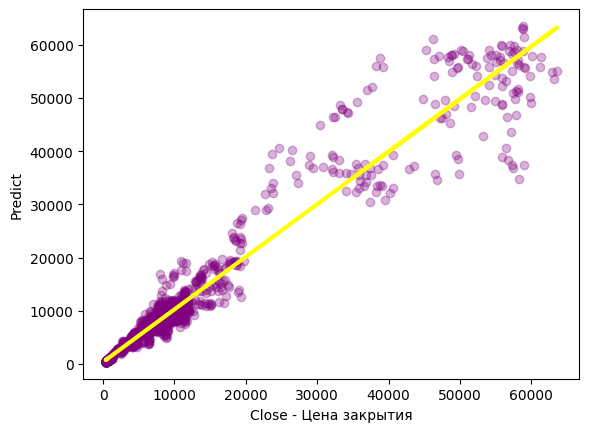

In [47]:
plt.figure()
plt.scatter(x, y, alpha=0.3, color = 'purple')

plt.plot(x, prediction, color='yellow', linewidth=3)

plt.xlabel("Close - Цена закрытия")
plt.ylabel("Predict")

# plt.xlim(0, 70000)
# plt.ylim(0, 70000)
plt.show()

9.	Предсказать стоимость криптовалюты за последние 14 дней с помощью функции “predict”.

In [48]:
prediction[-projection:]

array([[46611.91431788],
       [46330.48254265],
       [43424.42107753],
       [42765.670167  ],
       [36719.15920861],
       [40502.36849635],
       [37291.27921215],
       [37430.82815376],
       [34686.86340056],
       [38762.19487568],
       [38316.7775183 ],
       [39214.45567915],
       [38466.58173965],
       [35640.27806732]])

10.	Определить точность прогнозируемой цены закрытия с помощью функции “score”.

In [44]:
regression_model.score(x, y)

0.9490624388820347

Наша модель очень близка к правде

In [71]:
print(bitcoin['predict'].tail(14))
print(prediction[-projection:])


1987    35680.92
1988    34611.58
1989    35662.59
1990    37290.83
1991    36683.51
1992    37576.98
1993    39229.66
1994    36861.50
1995    35538.40
1996    35798.57
1997    33582.86
1998    33409.38
1999    37391.58
2000    36680.78
Name: predict, dtype: float64
[[46611.91431788]
 [46330.48254265]
 [43424.42107753]
 [42765.670167  ]
 [36719.15920861]
 [40502.36849635]
 [37291.27921215]
 [37430.82815376]
 [34686.86340056]
 [38762.19487568]
 [38316.7775183 ]
 [39214.45567915]
 [38466.58173965]
 [35640.27806732]]


12.	Загрузить housePrice.csv
13.	Произвести предобработку.

In [63]:
house_price = pd.read_csv('housePrice.csv')
print(house_price.describe())
house_price['Area'] = pd.to_numeric(house_price['Area'], errors='coerce')
house_price['Price(USD)'] = pd.to_numeric(house_price['Price(USD)'], errors='coerce')
x = house_price['Area']
y = house_price['Price(USD)']


              Room         Price    Price(USD)
count  3479.000000  3.479000e+03  3.479000e+03
mean      2.079908  5.359023e+09  1.786341e+05
std       0.758275  8.099935e+09  2.699978e+05
min       0.000000  3.600000e+06  1.200000e+02
25%       2.000000  1.418250e+09  4.727500e+04
50%       2.000000  2.900000e+09  9.666667e+04
75%       2.000000  6.000000e+09  2.000000e+05
max       5.000000  9.240000e+10  3.080000e+06


14.	Реализовать линейную регрессию вручную, без использования библиотеки.
За основу взять два признака: “Area” и “Price(USD)”.
15.	Вывести угол наклона и y-перехват.
16.	Визуализировать линию регрессии на диаграмме рассеяния. Изменить параметр плотности с помощью команды “alpha”.


In [54]:
n = np.size(x)  # количество точек
mean_x = np.mean(x)  # среднее значение векторов x и y
mean_y = np.mean(y)
# вычисление перекрестного отклонения и отклонения около x
SS_xy = np.sum(y * x) - n * mean_y * mean_x
SS_xx = np.sum(x * x) - n * mean_x * mean_x
b_1 = SS_xy / SS_xx  # вычисление коэфф регрессии
b_0 = mean_y - b_1 * mean_x
print(f'Коэффициенты:\nb_1 = {b_1}\nb_0 = {b_0}')

Коэффициенты:
b_1 = 2815.677849982167
b_0 = -122008.63512111109


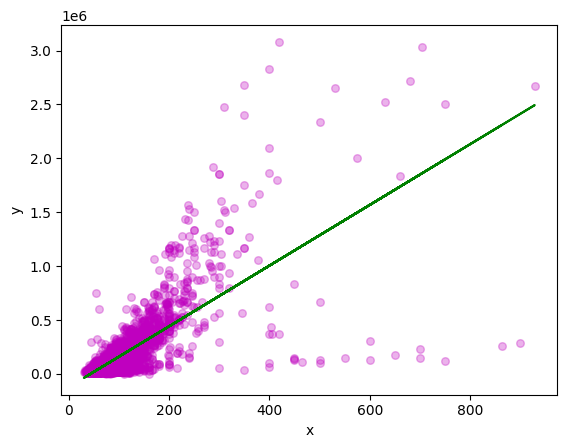

In [62]:
plt.scatter(x, y, color='m', marker='o', s=30, alpha=0.3)

y_pred = b_0 + b_1 * x

plt.plot(x, y_pred, color='g')
plt.xlabel('x')
plt.ylabel('y')

plt.show()